In [1]:
import numpy as np
import sympy as sp
from scipy.optimize import fmin_powell
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid
from scipy.integrate import simpson

In [2]:
#Método del trapecio:

#Defino para calcular la Inytegral por método de trapecios de la figura.
#Donde se recibe: la función X, los limites de la integral y el número de iteraciones.
def intetrap(f, a, b, N):

  x= np.linspace(a,b, int(N))

  dx = (b-a)/N  #Distancia de cada trapecio o desplazamiento; en este caso constante de x

  A= ((f(x[0]) + f(x[-1])) + 2*f(x[1:-1]).sum()) * dx * 0.5 #Área de Trapecio.

  return A


Optimization terminated successfully.
         Current function value: -1.448856
         Iterations: 2
         Function evaluations: 22


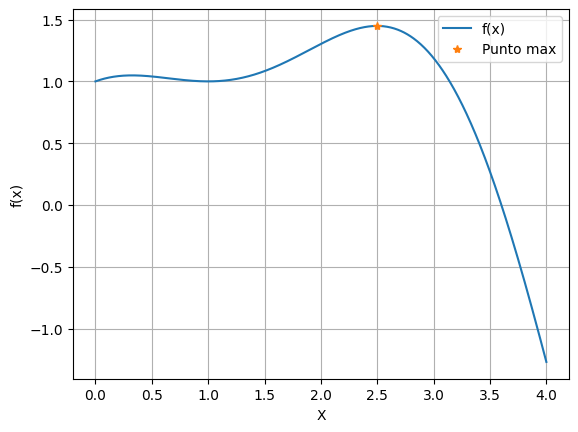

El máximo de la función es:  2.4985561902768487
El número de iteraciones para error es:  30
La integral es:  3.549784924986751


In [3]:
#Defino las variables y las funciones de forma simbòlica:
x = sp.symbols("x")

f =(((x-1)**2)*sp.sin(x)/3)+1

#Defino la funciòn inversa:
f_in = -((((x-1)**2)*sp.sin(x)/3)+1)

#Hallo las derivadas de las funciones:
df = sp.diff(f,x)
sdf = sp.diff(df,x)

#Paso las funciones a numpy
f_n = sp.lambdify(x,f,'numpy')
f_inu = sp.lambdify(x,f_in,'numpy')
sdf_n = sp.lambdify(x,sdf,'numpy')

#Límites de integración y error considerado:

E = 10e-3
a=0
b=4

#Encuentro el máximo de la función, el cual seria el minimo de la funciòn inversa.
max = fmin_powell(f_inu,(b-a)/2)[0]

#Evaluo el máximo en la segunda derivada para hallar n:
csi = float(sdf_n(max))

#Grafico para determinar si el maximo estaría correcto:
x_n = np.linspace(0,4,1000)
plt.plot(x_n, f_n(x_n), label="f(x)")
plt.plot(max, f_n(max), "*", label="Punto max")
plt.xlabel("X")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()

n = round(abs(((b-a)**3/(12*E) * csi)**(1/2)))

print("El máximo de la función es: ", max)
print("El número de iteraciones para error es: ", n)
print("La integral es: ", intetrap(f_n,a,b,n))

In [4]:
#Encontramos el error
inlib = trapezoid(f_n(x_n),x_n) #Integral librerìa

intra = intetrap(f_n,a,b,n)     #Integral trapecio desarrollado en clase.

print(inlib)
print(intra)



3.678225037402827
3.549784924986751


In [5]:
#Método de Simpson:

#Defino la funciòn Simpson:

def simpsons(f,a,b):

  A = ((b - a)/6) * (f(a) + 4*f((a+b)/2) + f(b))

  return A


#Defino funcione y lìmite:

f = lambda x: (x**2) - 1
a = 0
b = 4

print("La integral es: ", simpsons(f,a,b))




La integral es:  17.333333333333332


In [15]:
#Simpson Compuesta:

#Defino la función a la cual ingresan f, los límites (a,b) y n := el numero de intervalos a tomar, par.

def simpcom(f,a,b,n):

  h = (b-a)/n

  x = np.linspace(a,b,n)

  s_1 = 0
  s_2 = 0

  for j in range(0, int((n/2))):
    s_1 += f(x[2*j])
    s_2 += f(x[(2*j) - 1])
  s_2 += f(x[n-1])

  A= (h/3)*(f(a) + (2 * s_1) + (4 * s_2) + f(b))

  return A


a=0
b=4
n=560000
f = lambda x: (x**2) - 1

print("La integral es: ", simpcom(f,a,b,n))


La integral es:  17.333547619115656


In [7]:
a = 0
b = 4
n=5000

x = np.linspace(a,b,n)

f = (x**2) - 1
print("La integral por librería es: ", simpson(f,x))

La integral por librería es:  17.333333333333332


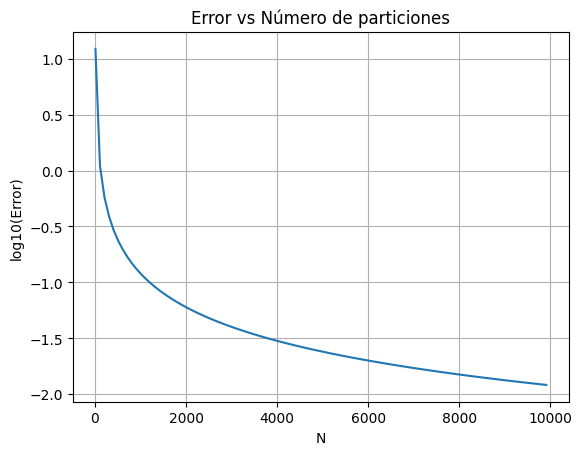

In [21]:
N = np.arange(10, 10001, 100)
Err = np.zeros(len(N))  # Crea un arreglo de ceros de la misma longitud que el arreglo N para almacenar los errores.

j = 0  # Inicializa un contador.
for i in N:
  x = np.linspace(a, b, i)  # Genera puntos equidistantes en el intervalo [a, b] con un nuevo número de subintervalos 'i'.
  ff = (x**2)-1  # Calcula los valores de la función en los nuevos puntos.
  simp_0 = simpson(ff, x)  # Calcula la integral de la función con la nueva discretización utilizando la función 'simpson'.
  Err[j] = abs(simpcom(f, a, b, i) - simp_0)  # Calcula el error entre las aproximaciones de 'simpcom' y 'simpson' y lo almacena en el arreglo 'Err'.
  j += 1  # Incrementa el contador.

plt.plot(N, np.log10(Err))  # Grafica el logaritmo en base 10 del arreglo de errores en función de 'N'.
plt.grid(True)
plt.xlabel("N")
plt.ylabel("log10(Error)")
plt.title("Error vs Número de particiones")
plt.show()

# Este código realiza un análisis de errores al comparar la aproximación de la integral usando 'simpson_1' con 'simpson'.